In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 1. Load Dataset
data = load_breast_cancer()
df = pd.DataFrame(np.c_[data.data, data.target],
                  columns=list(data.feature_names) + ['target'])

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# 2. Split Data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2020)

In [ ]:
# 3. Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion="gini"),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [ ]:
# 4. Train, Evaluate & Store Accuracy
accuracies = {}
fitted_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    fitted_models[name] = model
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-"*50)

Model: Logistic Regression
Accuracy: 0.9737
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        48
         1.0       0.97      0.98      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.9386
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        48
         1.0       0.94      0.95      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9649
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        48
         1.0   

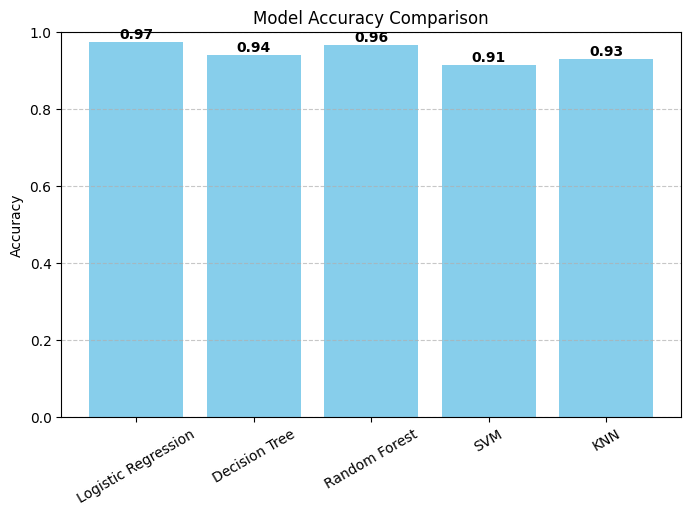

In [ ]:
# 5. Visualization
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10, fontweight='bold')
plt.show()

In [ ]:
# 6. Pick Best Model
best_model_name = max(accuracies, key=accuracies.get)
best_model = fitted_models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy = {accuracies[best_model_name]:.4f}")


Best Model: Logistic Regression with Accuracy = 0.9737


In [ ]:

new_sample = [
    17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760, 0.3001, 0.14710, 0.2419, 0.07871,
    1.0950, 0.9053, 8.589, 153.40, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890
]

# NumPy array + reshape (1 sample, 30 features)
new_data = np.array(new_sample).reshape(1, -1)

# Prediction
prediction = best_model.predict(new_data)[0]

# Result print
label = data.target_names[int(prediction)]
print(f"Predicted as: {label}")


Predicted as: malignant
